<a href="https://colab.research.google.com/github/chloepxj/geo_ASR_challenge_2024/blob/main/ASR_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import shutil

# Define source and destination paths
src_path = "/content/drive/MyDrive/ASR/geo_ASR_challenge_2024"
dst_path = "/content/geo_dataset"

# Copy the folder to the Colab working directory
shutil.copytree(src_path, dst_path)

print("Dataset copied to local workspace.")

Dataset copied to local workspace.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import numpy as np
import soundfile as sf
import os

## Data Preprocessing

- Audio Preprocessing
  - load the data folder
  - resampling
  - Noise Reduction
  - normalisation
- Feature Extraction
  - MFCC

In [47]:
# Paths to data folders and CSV files
DRIVE_PATH = "/content/drive/MyDrive"
DATA_PATH = DRIVE_PATH + "/ASR/geo_ASR_challenge_2024/"  # Folder containing all wav files
TRAIN_CSV = DRIVE_PATH + "/ASR/geo_ASR_challenge_2024/train.csv"
DEV_CSV = DRIVE_PATH + "/ASR/geo_ASR_challenge_2024/dev.csv"
TEST_CSV = DRIVE_PATH + "/ASR/geo_ASR_challenge_2024/test_release.csv"

In [48]:
# Parameters for audio processing
TARGET_SAMPLE_RATE = 16000
N_MFCC = 13  # Number of MFCC features to extract

In [49]:
# file_path = '/content/drive/MyDrive/ASR/geo_ASR_challenge_2024/geo/dev_0.wav'
# audio, sr = librosa.load(file_path, sr=TARGET_SAMPLE_RATE)


In [50]:
def load_and_preprocess_audio(file_path, sample_rate=TARGET_SAMPLE_RATE):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=sample_rate)
    # Normalize audio
    audio = librosa.util.normalize(audio)
    return audio

In [51]:
# Function to extract features (MFCCs here)
def extract_features(audio, sample_rate=TARGET_SAMPLE_RATE, n_mfcc=N_MFCC):
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    # Compute mean and transpose to make it (time, features)
    mfccs = np.mean(mfccs.T, axis=0)
    return mfccs

In [53]:
def process_dataset(csv_file, print_every=100):
    # Load the CSV file
    df = pd.read_csv(csv_file)
    features = []
    transcripts = []

    total_files = len(df)
    print(f"Processing {total_files} files from {csv_file}")

    for idx, row in df.iterrows():
        file_name = row['file']
        transcript = row['transcript'] if 'transcript' in row else None
        file_path = os.path.join(DATA_PATH, file_name)

        if os.path.exists(file_path):
            # Load and preprocess audio
            audio = load_and_preprocess_audio(file_path)
            # Extract features
            mfcc_features = extract_features(audio)

            features.append(mfcc_features)
            transcripts.append(transcript)
        else:
            print(f"Warning: {file_path} does not exist.")

        # Print progress every 'print_every' files
        if (idx + 1) % print_every == 0 or (idx + 1) == total_files:
            print(f"Processed {idx + 1}/{total_files} files")

    print(f"Completed processing {csv_file}\n")
    return np.array(features), transcripts

In [54]:
# Process train, dev, and test sets
train_features, train_transcripts = process_dataset(TRAIN_CSV)

Processing 6000 files from /content/drive/MyDrive/ASR/geo_ASR_challenge_2024/train.csv
Processed 100/6000 files
Processed 200/6000 files
Processed 300/6000 files
Processed 400/6000 files
Processed 500/6000 files
Processed 600/6000 files
Processed 700/6000 files
Processed 800/6000 files
Processed 900/6000 files
Processed 1000/6000 files
Processed 1100/6000 files
Processed 1200/6000 files
Processed 1300/6000 files
Processed 1400/6000 files
Processed 1500/6000 files
Processed 1600/6000 files
Processed 1700/6000 files
Processed 1800/6000 files
Processed 1900/6000 files
Processed 2000/6000 files
Processed 2100/6000 files
Processed 2200/6000 files
Processed 2300/6000 files
Processed 2400/6000 files
Processed 2500/6000 files
Processed 2600/6000 files
Processed 2700/6000 files
Processed 2800/6000 files
Processed 2900/6000 files
Processed 3000/6000 files
Processed 3100/6000 files
Processed 3200/6000 files
Processed 3300/6000 files
Processed 3400/6000 files
Processed 3500/6000 files
Processed 36

In [55]:
dev_features, dev_transcripts = process_dataset(DEV_CSV)

Processing 1000 files from /content/drive/MyDrive/ASR/geo_ASR_challenge_2024/dev.csv
Processed 100/1000 files
Processed 200/1000 files
Processed 300/1000 files
Processed 400/1000 files
Processed 500/1000 files
Processed 600/1000 files
Processed 700/1000 files
Processed 800/1000 files
Processed 900/1000 files
Processed 1000/1000 files
Completed processing /content/drive/MyDrive/ASR/geo_ASR_challenge_2024/dev.csv



In [56]:
test_features, test_transcripts = process_dataset(TEST_CSV)

Processing 1000 files from /content/drive/MyDrive/ASR/geo_ASR_challenge_2024/test_release.csv
Processed 100/1000 files
Processed 200/1000 files
Processed 300/1000 files
Processed 400/1000 files
Processed 500/1000 files
Processed 600/1000 files
Processed 700/1000 files
Processed 800/1000 files
Processed 900/1000 files
Processed 1000/1000 files
Completed processing /content/drive/MyDrive/ASR/geo_ASR_challenge_2024/test_release.csv



In [57]:
np.save("train_features.npy", train_features)
np.save("dev_features.npy", dev_features)
np.save("test_features.npy", test_features)

In [58]:
# Save transcripts if you need them for training/validation (example)
with open("train_transcripts.txt", "w") as f:
    for transcript in train_transcripts:
        f.write(f"{transcript}\n")

with open("dev_transcripts.txt", "w") as f:
    for transcript in dev_transcripts:
        f.write(f"{transcript}\n")

with open("test_transcripts.txt", "w") as f:
    for transcript in test_transcripts:
        f.write(f"{transcript}\n")

In [60]:
# copy files from working folder to google drive
# !cp /content/dev_features.npy /content/drive/MyDrive/ASR/
# !cp /content/dev_transcripts.txt /content/drive/MyDrive/ASR/
# !cp /content/test_features.npy /content/drive/MyDrive/ASR/
# !cp /content/test_transcripts.txt /content/drive/MyDrive/ASR/
# !cp /content/train_features.npy /content/drive/MyDrive/ASR/
# !cp /content/train_transcripts.txt /content/drive/MyDrive/ASR/


## Modeling
- Model Architecture:
  - Use models like Recurrent Neural Networks (RNNs), Convolutional Neural Networks (CNNs), or more recent architectures such as Transformers (e.g., Wav2Vec, SpeechTransformer).
- Training:
  - Train the model on the extracted features paired with text transcripts.
  - Loss functions for speech recognition models often involve Connectionist Temporal Classification (CTC) loss or cross-entropy loss.

### Data Visualization

In [61]:
# Basic Data Statistics

# Load CSV files
train_df = pd.read_csv(TRAIN_CSV)
dev_df = pd.read_csv(DEV_CSV)
test_df = pd.read_csv(TEST_CSV)

# Check the number of samples
print(f"Number of training samples: {len(train_df)}")
print(f"Number of validation samples: {len(dev_df)}")
print(f"Number of test samples: {len(test_df)}")

# Vocabulary size
all_transcripts = " ".join(train_df['transcript'].fillna("").tolist())
vocab = set(all_transcripts.split())
print(f"Vocabulary size: {len(vocab)}")

Number of training samples: 6000
Number of validation samples: 1000
Number of test samples: 1000
Vocabulary size: 12505


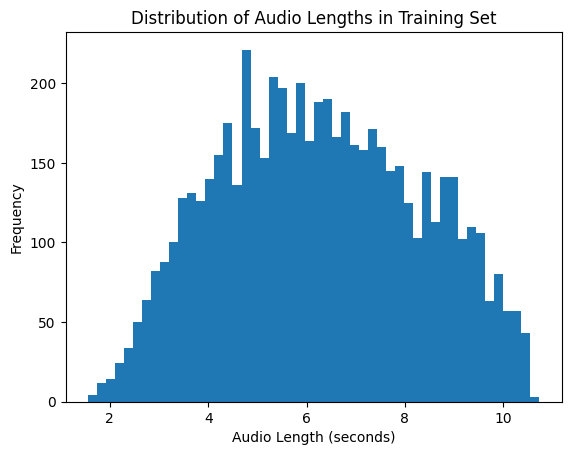

In [76]:
def get_audio_length(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return len(audio) / sr  # Duration in seconds

# Get lengths of training audio files
train_lengths = [get_audio_length(os.path.join(DATA_PATH, file)) for file in train_df['file']]

# Plot distribution
plt.hist(train_lengths, bins=50)
plt.xlabel("Audio Length (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Audio Lengths in Training Set")
plt.show()

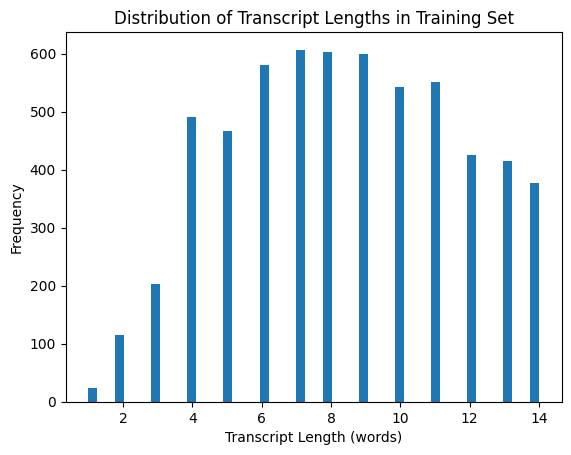

In [77]:
# Length of each transcript in words
train_transcript_lengths = train_df['transcript'].apply(lambda x: len(str(x).split()))

# Plot distribution
plt.hist(train_transcript_lengths, bins=50)
plt.xlabel("Transcript Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Transcript Lengths in Training Set")
plt.show()

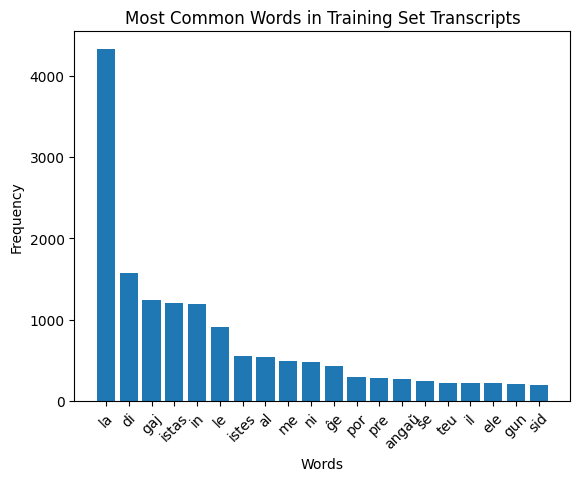

In [78]:
from collections import Counter

# Get all words in the training transcripts
all_words = " ".join(train_df['transcript'].fillna("")).split()
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(20)

# Plot the 20 most common words
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Training Set Transcripts")
plt.show()

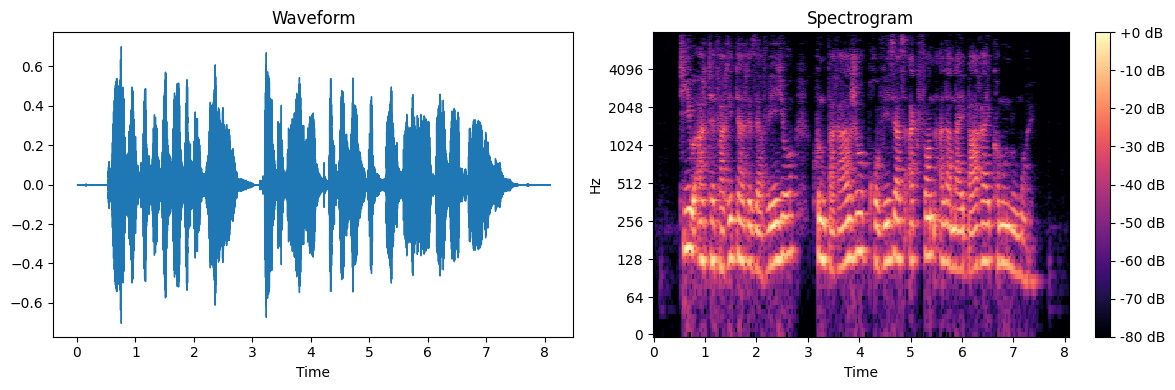

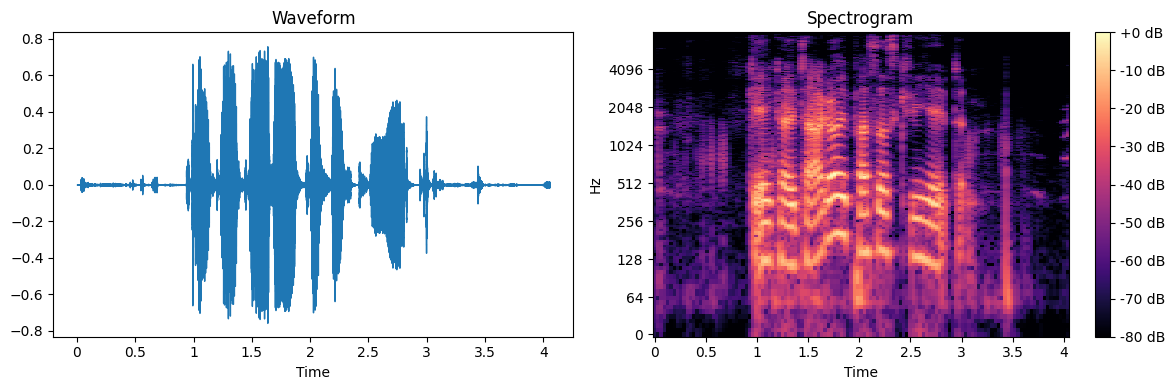

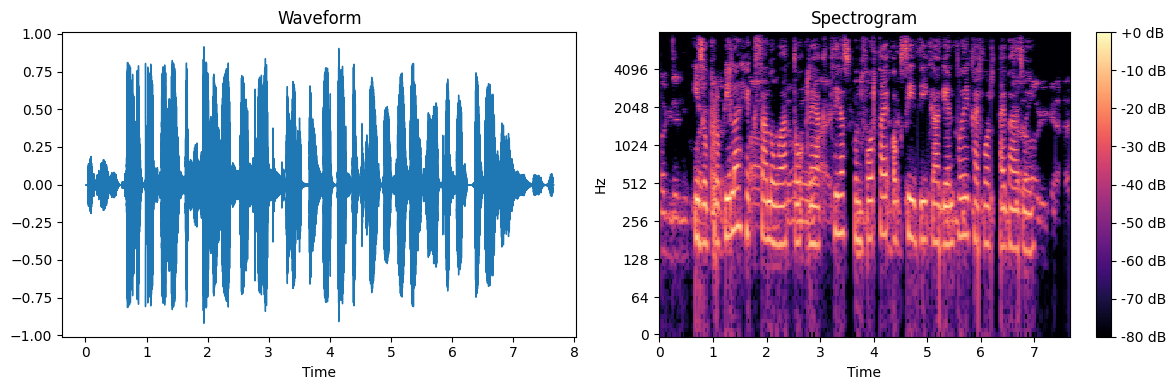

In [65]:
import librosa.display

def plot_waveform_and_spectrogram(file_path):
    audio, sr = librosa.load(file_path, sr=None)

    # Plot waveform
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title("Waveform")

    # Plot spectrogram
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")

    plt.tight_layout()
    plt.show()

# Visualize a few samples
sample_files = train_df['file'].sample(3)
for sample_file in sample_files:
    plot_waveform_and_spectrogram(os.path.join(DATA_PATH, sample_file))

In [74]:
# def plot_mfcc_1d(features, num_samples=5):
#     """
#     Visualizes the MFCC features for a specified number of samples (1D MFCCs).
#     Args:
#     - features: MFCC features as a numpy array (num_samples, num_mfcc_coeffs)
#     - num_samples: Number of samples to visualize
#     """
#     for i in range(num_samples):
#         sample_mfcc = features[i]  # Get the MFCC features for sample i

#         # Plot MFCCs as a bar plot (MFCC coefficients)
#         plt.figure(figsize=(10, 6))
#         plt.bar(range(len(sample_mfcc)), sample_mfcc)
#         plt.title(f"MFCC Coefficients for Sample {i+1}")
#         plt.xlabel("MFCC Coefficients")
#         plt.ylabel("Magnitude")
#         plt.xticks(range(len(sample_mfcc)), [f"MFCC-{i+1}" for i in range(len(sample_mfcc))])
#         plt.show()

# # Visualize MFCCs for the first 5 samples in train_features
# plot_mfcc_1d(train_features, num_samples=5)

In [75]:
# def plot_log_mel_spectrogram(y, sr, n_mels=128, hop_length=512, n_fft=2048, fmin=0, fmax=None):
#     """
#     Plots the logarithmic mel-spectrogram of an audio signal.

#     Parameters:
#     - y: Audio time series
#     - sr: Sample rate of the audio
#     - n_mels: Number of mel frequency bins (default: 128)
#     - hop_length: Hop length (number of samples between frames)
#     - n_fft: FFT window size
#     - fmin: Minimum frequency (default: 0)
#     - fmax: Maximum frequency (default: sr / 2)
#     """
#     # Compute Mel spectrogram
#     mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
#                                                      hop_length=hop_length, n_fft=n_fft,
#                                                      fmin=fmin, fmax=fmax)

#     # Convert to logarithmic scale (dB)
#     log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

#     # Plot the log-mel spectrogram
#     plt.figure(figsize=(10, 6))
#     librosa.display.specshow(log_mel_spectrogram, x_axis='time', y_axis='mel', cmap='viridis')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title('Log-Mel Spectrogram')
#     plt.show()

# # Example: Visualize the log-mel spectrogram for an audio file or a sample signal
# # Load an example audio file
# y, sr = librosa.load('/content/geo_dataset/geo/train_0.wav', sr=None)

# # Plot the log-mel spectrogram
# plot_log_mel_spectrogram(y, sr)

## Post-Processing

- Decoding:
  - Convert the model’s output (typically a sequence of probabilities) into the most probable sequence of words. Techniques like beam search or a language model (LM) can improve accuracy.
- Language Modeling:
  - Use an external LM to help correct or predict likely word sequences, refining the raw output.

## Evaluation
- Accuracy Metrics:
  - Evaluate using metrics like Word Error Rate (WER) or Character Error Rate (CER) to measure the model’s performance.
- Fine-tuning:
  - Adjust hyperparameters, model architecture, or training data based on the evaluation results.